## Navie_Bayes
### 1) Prepare a classification model using Naive Bayes for salary data 

## ANSWER:

In [1]:
#Import necessary libaries
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score



In [2]:
# Get the dataset
salary_train=pd.read_csv("SDTrain.csv")
salary_test=pd.read_csv("SDTest.csv")

In [3]:
#Join the dataset
df = salary_train.merge(salary_test,how='outer')

In [4]:
#Let's find shape
df.shape

(45276, 14)

In [5]:
#Let's find the head i.e top five rows
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
col_names = ['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation', 'relationship',
             'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native', 'Salary']
df.columns = col_names
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
#Let's find the info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45276 entries, 0 to 45275
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45276 non-null  int64 
 1   workclass      45276 non-null  object
 2   education      45276 non-null  object
 3   educationno    45276 non-null  int64 
 4   maritalstatus  45276 non-null  object
 5   occupation     45276 non-null  object
 6   relationship   45276 non-null  object
 7   race           45276 non-null  object
 8   sex            45276 non-null  object
 9   capitalgain    45276 non-null  int64 
 10  capitalloss    45276 non-null  int64 
 11  hoursperweek   45276 non-null  int64 
 12  native         45276 non-null  object
 13  Salary         45276 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [9]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [10]:
# view the categorical variables
df[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [11]:
# check missing values in categorical variables
df[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [12]:
# view frequency counts of values in categorical variables
for var in categorical: 
    
    print(df[var].value_counts())

 Private             33519
 Self-emp-not-inc     3755
 Local-gov            3044
 State-gov            1922
 Self-emp-inc         1627
 Federal-gov          1388
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         15403
 Some-college     9737
 Bachelors        7358
 Masters          2452
 Assoc-voc        1933
 11th             1606
 Assoc-acdm       1490
 10th             1199
 7th-8th           818
 Prof-school       776
 9th               666
 12th              567
 Doctorate         538
 5th-6th           443
 1st-4th           219
 Preschool          71
Name: education, dtype: int64
 Married-civ-spouse       21377
 Never-married            14463
 Divorced                  6174
 Separated                 1407
 Widowed                   1271
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6728
 Prof-specialty       5892
 Exec-managerial      5803
 Adm-clerical         5448
 Sales           

In [13]:
# view frequency distribution of categorical variables
for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))


 Private             0.740326
 Self-emp-not-inc    0.082936
 Local-gov           0.067232
 State-gov           0.042451
 Self-emp-inc        0.035935
 Federal-gov         0.030656
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.340202
 Some-college    0.215059
 Bachelors       0.162514
 Masters         0.054157
 Assoc-voc       0.042694
 11th            0.035471
 Assoc-acdm      0.032909
 10th            0.026482
 7th-8th         0.018067
 Prof-school     0.017139
 9th             0.014710
 12th            0.012523
 Doctorate       0.011883
 5th-6th         0.009784
 1st-4th         0.004837
 Preschool       0.001568
Name: education, dtype: float64
 Married-civ-spouse       0.472149
 Never-married            0.319441
 Divorced                 0.136364
 Separated                0.031076
 Widowed                  0.028072
 Married-spouse-absent    0.012192
 Married-AF-spouse        0.000707
Name: maritalstatus, dtype: float64
 Craft-repair         0.14860

In [14]:
# check labels in workclass variable
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [15]:
# check frequency distribution of values in workclass variable
df.workclass.value_counts()

 Private             33519
 Self-emp-not-inc     3755
 Local-gov            3044
 State-gov            1922
 Self-emp-inc         1627
 Federal-gov          1388
 Without-pay            21
Name: workclass, dtype: int64

In [16]:
# replace '?' values in workclass variable with `NaN`
df['workclass'].replace('?', np.NaN, inplace=True)

In [17]:
# again check the frequency distribution of values in workclass variable
df.workclass.value_counts()

 Private             33519
 Self-emp-not-inc     3755
 Local-gov            3044
 State-gov            1922
 Self-emp-inc         1627
 Federal-gov          1388
 Without-pay            21
Name: workclass, dtype: int64

In [18]:
# check labels in occupation variable
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [19]:
# check frequency distribution of values in occupation variable
df.occupation.value_counts()

 Craft-repair         6728
 Prof-specialty       5892
 Exec-managerial      5803
 Adm-clerical         5448
 Sales                5293
 Other-service        4720
 Machine-op-inspct    3056
 Transport-moving     2251
 Handlers-cleaners    2026
 Farming-fishing      1463
 Tech-support         1389
 Protective-serv       961
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [20]:
# replace '?' values in occupation variable with `NaN`
df['occupation'].replace('?', np.NaN, inplace=True)

In [21]:
# again check the frequency distribution of values in occupation variable
df.occupation.value_counts()

 Craft-repair         6728
 Prof-specialty       5892
 Exec-managerial      5803
 Adm-clerical         5448
 Sales                5293
 Other-service        4720
 Machine-op-inspct    3056
 Transport-moving     2251
 Handlers-cleaners    2026
 Farming-fishing      1463
 Tech-support         1389
 Protective-serv       961
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [22]:
# check labels in native_country variable
df.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [23]:
# check frequency distribution of values in native_country variable
df.native.value_counts()

 United-States                 41363
 Mexico                          890
 Philippines                     281
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 India                           147
 El-Salvador                     147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         102
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

In [24]:
# replace '?' values in native_country variable with `NaN`
df['native'].replace('?', np.NaN, inplace=True)

In [25]:
# again check the frequency distribution of values in native_country variable
df.native.value_counts()

 United-States                 41363
 Mexico                          890
 Philippines                     281
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 India                           147
 El-Salvador                     147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         102
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

In [26]:
df[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [27]:
# check for cardinality in categorical variables
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [28]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [29]:
# view the numerical variables
df[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [30]:
# check missing values in numerical variables
df[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [31]:
#Divide the data set into dependent and independent variable
X = df.drop(['Salary'], axis=1)
y = df['Salary']

In [32]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [33]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((31693, 13), (13583, 13))

In [34]:
# check data types in X_train
X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [35]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [36]:
# display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [37]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [38]:
# print categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [39]:
# impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)  

C:\Users\91830\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [40]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [41]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [42]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [43]:
# check missing values in X_test
X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [44]:
# print categorical variables
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [45]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
42519,Private,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
12857,Private,7th-8th,Divorced,Machine-op-inspct,Not-in-family,White,Female,United-States
44871,Local-gov,Assoc-voc,Never-married,Adm-clerical,Unmarried,White,Male,United-States
30372,Private,Some-college,Divorced,Prof-specialty,Unmarried,White,Female,United-States
44509,Local-gov,HS-grad,Never-married,Protective-serv,Unmarried,Black,Male,United-States


In [46]:
# pip install category_encoders

In [53]:
import category_encoders
import category_encoders as ce

In [55]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


C:\Users\91830\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [56]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
42519,35,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12857,52,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
44871,26,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30372,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44509,38,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X_train.shape

(31693, 102)

In [58]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
15574,30,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10790,48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42711,62,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27299,41,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9843,26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X_test.shape

(13583, 102)

In [61]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
15574,30,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10790,48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42711,62,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27299,41,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9843,26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X_test.shape

(13583, 102)

### Feature Scaling

In [63]:
cols = X_train.columns

In [64]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [65]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [66]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [67]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,-0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.789474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.578947,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.052632,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model training

In [68]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [69]:
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

### Check accuracy score 

In [70]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8086


In [71]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [72]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8092


### Check for overfitting and underfitting

In [73]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8092
Test set score: 0.8086


In [74]:
# check class distribution in test set
y_test.value_counts()

 <=50K    10332
 >50K      3251
Name: Salary, dtype: int64

In [75]:
# check null accuracy score
null_accuracy = (7407/(7407+2362))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


### Confusion matrix

In [76]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8445 1887]
 [ 713 2538]]

True Positives(TP) =  8445

True Negatives(TN) =  2538

False Positives(FP) =  1887

False Negatives(FN) =  713


<AxesSubplot:>

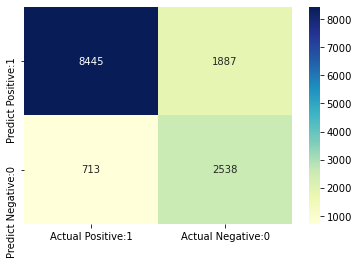

In [78]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification metrices 

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.82      0.87     10332
        >50K       0.57      0.78      0.66      3251

    accuracy                           0.81     13583
   macro avg       0.75      0.80      0.76     13583
weighted avg       0.84      0.81      0.82     13583



In [80]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [81]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8086


In [82]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1914


In [83]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8174


In [84]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9221


In [85]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9221


In [86]:
false_positive_rate = FP / float(FP + TN) 
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4264


In [87]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5736


### Calculate class probabilities

In [88]:
# print the first 10 predicted probabilities of two classes- 0 and 1
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob

array([[9.99986568e-01, 1.34317613e-05],
       [3.66406522e-04, 9.99633593e-01],
       [9.98916632e-01, 1.08336795e-03],
       [1.02213072e-19, 1.00000000e+00],
       [7.53546786e-01, 2.46453214e-01],
       [6.60550389e-01, 3.39449611e-01],
       [9.99309463e-01, 6.90537071e-04],
       [2.88819295e-01, 7.11180705e-01],
       [9.99999910e-01, 9.04460833e-08],
       [9.99999630e-01, 3.70345146e-07]])

In [89]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999866e-01,1.343176e-05
1,3.664065e-04,9.996336e-01
2,9.989166e-01,1.083368e-03
3,1.022131e-19,1.000000e+00
4,7.535468e-01,2.464532e-01
5,6.605504e-01,3.394496e-01
6,9.993095e-01,6.905371e-04
7,2.888193e-01,7.111807e-01
8,9.999999e-01,9.044608e-08
9,9.999996e-01,3.703451e-07


In [90]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K 
gnb.predict_proba(X_test)[0:10, 1]

array([1.34317613e-05, 9.99633593e-01, 1.08336795e-03, 1.00000000e+00,
       2.46453214e-01, 3.39449611e-01, 6.90537071e-04, 7.11180705e-01,
       9.04460833e-08, 3.70345146e-07])

In [91]:
# store the predicted probabilities for class 1 - Probability of >50K
y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

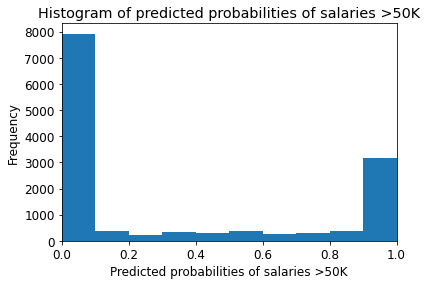

In [93]:
import matplotlib.pyplot as plt
# plot histogram of predicted probabilities
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

###  ROC - AUC Curve

C:\Users\91830\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


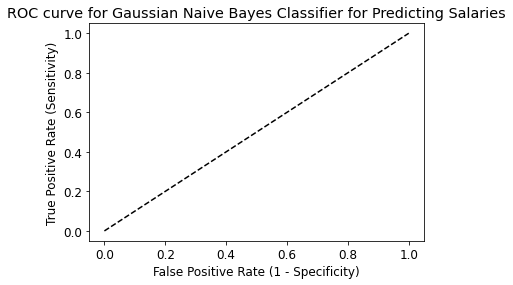

In [94]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [95]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8901


In [96]:
# calculate cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8900


### k-Fold Cross Validation 

In [97]:
# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81955836 0.81640379 0.79905363 0.80593247 0.81476807 0.80593247
 0.80814137 0.80593247 0.80782581 0.80845693]


In [99]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8092
